In [169]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

In [170]:
df = pd.read_csv('train.csv')

In [171]:
df

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,42976693,2016-04-09,2015-11-07,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,10,2.5,-3,5,37.0,Female,0
3164,50503195,2016-05-23,2015-12-17,NaN,NaN,NaN,NaN,0.0,Tavern_district_5,7,2.5,-3,10,2.5,-3,5,31.0,Female,0
3165,66034984,2016-09-14,2016-08-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-3,5,3.5,-3,5,26.0,Male,1
3166,65042945,2016-09-09,2016-03-14,NaN,NaN,NaN,NaN,0.0,Tavern_district_7,7,2.5,-3,11,2.5,-3,5,28.0,Female,0


In [172]:
print(df.isna().sum())

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       2633
Secret_dwarf_info_2       2633
Secret_dwarf_info_3       2633
First_default_date        2633
Successful_deals_count      14
Region                       7
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Hashed_deal_detail_6         0
Age                          0
Gender                       0
Default                      0
dtype: int64


In [173]:
print(df.nunique())

Deal_id                   3168
Deal_date                  486
First_deal_date            545
Secret_dwarf_info_1          8
Secret_dwarf_info_2          6
Secret_dwarf_info_3          4
First_default_date          68
Successful_deals_count      14
Region                       8
Tavern                      19
Hashed_deal_detail_1         7
Hashed_deal_detail_2        23
Hashed_deal_detail_3        23
Hashed_deal_detail_4        21
Hashed_deal_detail_5         7
Hashed_deal_detail_6         1
Age                         50
Gender                       2
Default                      2
dtype: int64


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     535 non-null    float64
 4   Secret_dwarf_info_2     535 non-null    float64
 5   Secret_dwarf_info_3     535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

In [175]:
df["Default"].value_counts()

Default
0    2817
1     351
Name: count, dtype: int64

In [176]:
df_i = df.interpolate()

In [177]:
df_i

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,3.5,-2.0,5.0,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,3.5,-2.0,5.0,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,3.5,-2.0,5.0,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,42976693,2016-04-09,2015-11-07,3.5,-2.0,5.0,NaN,0.0,Tavern_district_3,7,2.5,-3,10,2.5,-3,5,37.0,Female,0
3164,50503195,2016-05-23,2015-12-17,3.5,-2.0,5.0,NaN,0.0,Tavern_district_5,7,2.5,-3,10,2.5,-3,5,31.0,Female,0
3165,66034984,2016-09-14,2016-08-15,3.5,-2.0,5.0,NaN,0.0,Tavern_district_4,7,2.5,-3,5,3.5,-3,5,26.0,Male,1
3166,65042945,2016-09-09,2016-03-14,3.5,-2.0,5.0,NaN,0.0,Tavern_district_7,7,2.5,-3,11,2.5,-3,5,28.0,Female,0


In [178]:
categorical_columns = df_i.select_dtypes(include=['object']).columns
categorical_columns

Index(['Deal_date', 'First_deal_date', 'First_default_date', 'Region',
       'Gender'],
      dtype='object')

In [179]:
num_columns = df_i.select_dtypes(exclude=['object']).columns
num_columns

Index(['Deal_id', 'Secret_dwarf_info_1', 'Secret_dwarf_info_2',
       'Secret_dwarf_info_3', 'Successful_deals_count', 'Tavern',
       'Hashed_deal_detail_1', 'Hashed_deal_detail_2', 'Hashed_deal_detail_3',
       'Hashed_deal_detail_4', 'Hashed_deal_detail_5', 'Hashed_deal_detail_6',
       'Age', 'Default'],
      dtype='object')

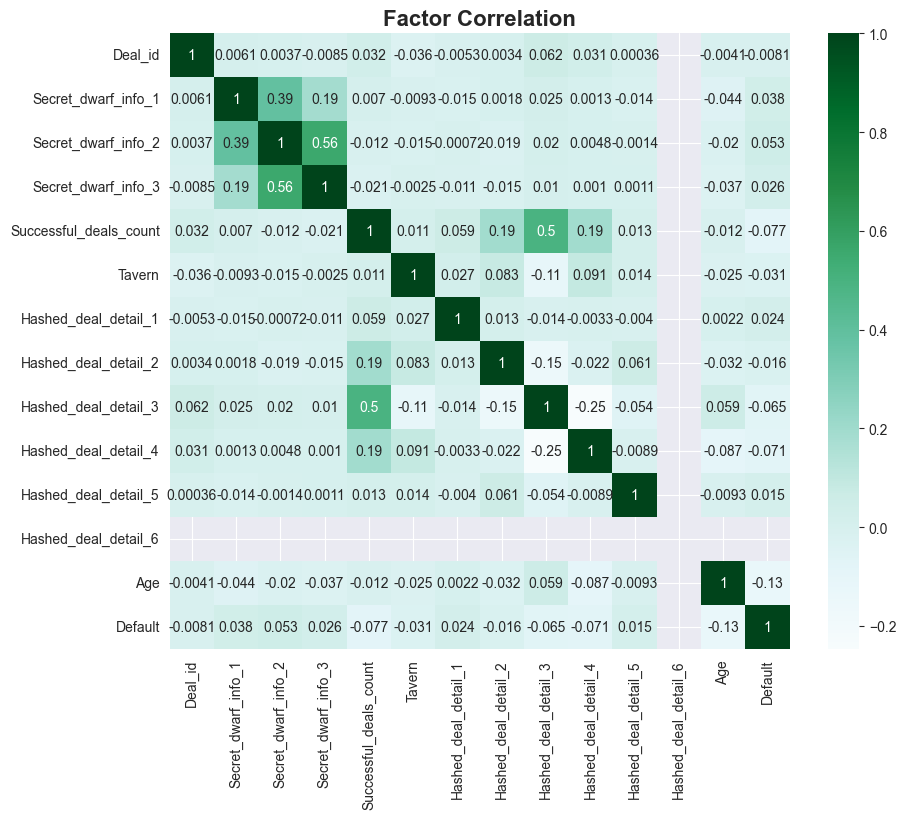

In [180]:
corr = df_i[num_columns].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = 'BuGn', annot = True)
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)
plt.show()

In [181]:
#Вывод топа корреляции
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_i[num_columns], 10))

Top Absolute Correlations
Secret_dwarf_info_2     Secret_dwarf_info_3     0.560194
Successful_deals_count  Hashed_deal_detail_3    0.495189
Secret_dwarf_info_1     Secret_dwarf_info_2     0.386294
Hashed_deal_detail_3    Hashed_deal_detail_4    0.247673
Successful_deals_count  Hashed_deal_detail_4    0.193246
                        Hashed_deal_detail_2    0.192004
Secret_dwarf_info_1     Secret_dwarf_info_3     0.190661
Hashed_deal_detail_2    Hashed_deal_detail_3    0.147369
Age                     Default                 0.125430
Tavern                  Hashed_deal_detail_3    0.109438
dtype: float64


In [182]:
### Посмотрим на квазиконстантые признаки
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df_i[num_columns])
print(cutter.get_feature_names_out())
print(num_columns)

['Deal_id' 'Secret_dwarf_info_1' 'Secret_dwarf_info_2'
 'Secret_dwarf_info_3' 'Successful_deals_count' 'Tavern'
 'Hashed_deal_detail_1' 'Hashed_deal_detail_2' 'Hashed_deal_detail_3'
 'Hashed_deal_detail_4' 'Age']
Index(['Deal_id', 'Secret_dwarf_info_1', 'Secret_dwarf_info_2',
       'Secret_dwarf_info_3', 'Successful_deals_count', 'Tavern',
       'Hashed_deal_detail_1', 'Hashed_deal_detail_2', 'Hashed_deal_detail_3',
       'Hashed_deal_detail_4', 'Hashed_deal_detail_5', 'Hashed_deal_detail_6',
       'Age', 'Default'],
      dtype='object')


In [183]:
X = df_i.drop(['Default'], axis=1)
Y = df_i['Default']

In [184]:
categorical_features = ['Region','Gender']

In [185]:
X

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female
2,34822849,2016-02-18,2015-11-11,3.5,-2.0,5.0,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female
3,46893387,2016-04-30,2016-03-22,3.5,-2.0,5.0,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female
4,67128275,2016-09-19,2016-07-21,3.5,-2.0,5.0,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,42976693,2016-04-09,2015-11-07,3.5,-2.0,5.0,NaN,0.0,Tavern_district_3,7,2.5,-3,10,2.5,-3,5,37.0,Female
3164,50503195,2016-05-23,2015-12-17,3.5,-2.0,5.0,NaN,0.0,Tavern_district_5,7,2.5,-3,10,2.5,-3,5,31.0,Female
3165,66034984,2016-09-14,2016-08-15,3.5,-2.0,5.0,NaN,0.0,Tavern_district_4,7,2.5,-3,5,3.5,-3,5,26.0,Male
3166,65042945,2016-09-09,2016-03-14,3.5,-2.0,5.0,NaN,0.0,Tavern_district_7,7,2.5,-3,11,2.5,-3,5,28.0,Female


In [186]:
most_common_date = X['First_default_date'].mode()[0]

print(f'Наиболее часто встречающаяся дата: {most_common_date}')

Наиболее часто встречающаяся дата: 2016-01-15


In [187]:
X['Deal_date'] = pd.to_datetime(X['Deal_date']).fillna(pd.Timestamp('2016-09-18')).map(pd.Timestamp.toordinal)
X['First_deal_date'] = pd.to_datetime(X['First_deal_date']).fillna(pd.Timestamp('2015-10-10')).map(pd.Timestamp.toordinal)
X['First_default_date'] = pd.to_datetime(X['First_default_date']).fillna(pd.Timestamp('2016-01-15')).map(pd.Timestamp.toordinal)


In [188]:
# for feature in categorical_features:
#     X[f'{feature}'] = X[f'{feature}'].astype(str).fillna('missing')

In [189]:
most_common_region = X['Region'].mode()[0]
X['Region'] = X['Region'].fillna(most_common_region)

In [190]:
print(X.isna().sum())

Deal_id                   0
Deal_date                 0
First_deal_date           0
Secret_dwarf_info_1       1
Secret_dwarf_info_2       1
Secret_dwarf_info_3       1
First_default_date        0
Successful_deals_count    0
Region                    0
Tavern                    0
Hashed_deal_detail_1      0
Hashed_deal_detail_2      0
Hashed_deal_detail_3      0
Hashed_deal_detail_4      0
Hashed_deal_detail_5      0
Hashed_deal_detail_6      0
Age                       0
Gender                    0
dtype: int64


In [191]:
X_test_f = pd.read_csv('test.csv')

In [146]:
# df_test

In [143]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
model.fit(X, Y, cat_features=categorical_features)

# Расчет ROC AUC
# roc_auc = roc_auc_score(Y_test, y_pred_proba)
# 
# print(f'ROC AUC: {roc_auc}')


In [192]:
X_test_f['Deal_date'] = pd.to_datetime(X_test_f['Deal_date']).fillna(pd.Timestamp('2016-09-18')).map(pd.Timestamp.toordinal)
X_test_f['First_deal_date'] = pd.to_datetime(X_test_f['First_deal_date']).fillna(pd.Timestamp('2015-10-10')).map(pd.Timestamp.toordinal)
X_test_f['First_default_date'] = pd.to_datetime(X_test_f['First_default_date']).fillna(pd.Timestamp('2016-01-15')).map(pd.Timestamp.toordinal)
most_common_region = X_test_f['Region'].mode()[0]
X_test_f['Region'] = X_test_f['Region'].fillna(most_common_region)

In [148]:
# Предсказание вероятностей на тестовом множестве
# y_pred_proba = model.predict_proba(X_test)[:, 1]

In [149]:
# # Создание DataFrame для предсказаний
# predictions = pd.DataFrame({
#     'Deal_id': X_test['Deal_id'],
#     'Prediction': y_pred_proba
# })
# 
# # Сохранение в CSV файл
# predictions.to_csv('predictions1.csv', index=False)


In [150]:
for col in categorical_features:
    one_hot = pd.get_dummies(X[col], prefix=col, drop_first=True, dtype=int)
    X = pd.concat((X.drop(col, axis=1), one_hot), axis=1)
    one_hot2 = pd.get_dummies(X_test_f[col], prefix=col, drop_first=True, dtype=int)
    X_test_f = pd.concat((X_test_f.drop(col, axis=1), one_hot2), axis=1)

In [151]:
X

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Tavern,Hashed_deal_detail_1,...,Hashed_deal_detail_6,Age,Region_Tavern_district_1,Region_Tavern_district_2,Region_Tavern_district_3,Region_Tavern_district_4,Region_Tavern_district_5,Region_Tavern_district_6,Region_Tavern_district_7,Gender_Male
0,22487461,735907,735839,NaN,NaN,NaN,735978,0.0,7,2.5,...,5,36.0,0,0,1,0,0,0,0,1
1,62494261,736202,735953,3.5,-2.0,5.0,736175,2.0,7,2.5,...,5,29.0,0,0,0,1,0,0,0,0
2,34822849,736012,735913,3.5,-2.0,5.0,735978,0.0,7,2.5,...,5,56.0,0,0,0,0,0,1,0,0
3,46893387,736084,736045,3.5,-2.0,5.0,735978,0.0,13,2.5,...,5,27.0,0,1,0,0,0,0,0,0
4,67128275,736226,736166,3.5,-2.0,5.0,735978,0.0,39,2.5,...,5,37.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,42976693,736063,735909,3.5,-2.0,5.0,735978,0.0,7,2.5,...,5,37.0,0,0,1,0,0,0,0,0
3164,50503195,736107,735949,3.5,-2.0,5.0,735978,0.0,7,2.5,...,5,31.0,0,0,0,0,1,0,0,0
3165,66034984,736221,736191,3.5,-2.0,5.0,735978,0.0,7,2.5,...,5,26.0,0,0,0,1,0,0,0,1
3166,65042945,736216,736037,3.5,-2.0,5.0,735978,0.0,7,2.5,...,5,28.0,0,0,0,0,0,0,1,0


In [152]:
print(X.isna().sum())

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_dwarf_info_1         1
Secret_dwarf_info_2         1
Secret_dwarf_info_3         1
First_default_date          0
Successful_deals_count      0
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Hashed_deal_detail_6        0
Age                         0
Region_Tavern_district_1    0
Region_Tavern_district_2    0
Region_Tavern_district_3    0
Region_Tavern_district_4    0
Region_Tavern_district_5    0
Region_Tavern_district_6    0
Region_Tavern_district_7    0
Gender_Male                 0
dtype: int64


In [193]:
X['Secret_dwarf_info_1'] = X['Secret_dwarf_info_1'].fillna(0)
X['Secret_dwarf_info_2'] = X['Secret_dwarf_info_2'].fillna(0)
X['Secret_dwarf_info_3'] = X['Secret_dwarf_info_3'].fillna(0)

In [194]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X,Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2)

ValueError: could not convert string to float: 'Tavern_district_3'

In [155]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_smote == 0)))

NameError: name 'Y_train' is not defined

In [253]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
model.fit(X_train_smote, y_train_smote)
y_pred_proba = model.predict_proba(X_test_smote)[:, 1]
# Расчет ROC AUC
roc_auc = roc_auc_score(y_test_smote, y_pred_proba)

print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9800363663913932


In [160]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Определение модели XGBoost с использованием бустинга и регуляризации
model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42, reg_alpha=1, reg_lambda=1)

# Обучение модели на данных с использованием SMOTE (если требуется)
model.fit(X_train_smote, y_train_smote)

# Предсказание вероятностей на тестовом множестве
y_pred_proba = model.predict_proba(X_test_smote)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_test_smote, y_pred_proba)

print(f'ROC AUC с использованием XGBoost: {roc_auc}')

ROC AUC с использованием XGBoost: 0.9768466849522368


In [115]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# 
# # Определение модели RandomForestClassifier с настройками по умолчанию
# model_rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42)
# 
# # Обучение модели на данных с использованием SMOTE (если требуется)
# model_rf.fit(X_train_smote, y_train_smote)
# 
# # Предсказание вероятностей на тестовом множестве
# y_pred_proba_rf = model_rf.predict_proba(X_test_smote)[:, 1]
# 
# # Расчет ROC AUC
# roc_auc_rf = roc_auc_score(y_test_smote, y_pred_proba_rf)
# 
# print(f'ROC AUC с использованием RandomForestClassifier: {roc_auc_rf}')

ROC AUC с использованием RandomForestClassifier: 0.9469848708161698


In [119]:
print(X_test_f.isna().sum())

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_dwarf_info_1         0
Secret_dwarf_info_2         0
Secret_dwarf_info_3         0
First_default_date          0
Successful_deals_count      1
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Hashed_deal_detail_6        0
Age                         0
Region_Tavern_district_1    0
Region_Tavern_district_2    0
Region_Tavern_district_3    0
Region_Tavern_district_4    0
Region_Tavern_district_5    0
Region_Tavern_district_6    0
Region_Tavern_district_7    0
Gender_Male                 0
dtype: int64


In [121]:
X_test_f['Secret_dwarf_info_1'] = X_test_f['Secret_dwarf_info_1'].fillna(0)
X_test_f['Secret_dwarf_info_2'] = X_test_f['Secret_dwarf_info_2'].fillna(0)
X_test_f['Secret_dwarf_info_3'] = X_test_f['Secret_dwarf_info_3'].fillna(0)
X_test_f['Successful_deals_count'] = X_test_f['Successful_deals_count'].fillna(0.0)

In [161]:
# Предсказание вероятностей на тестовом множестве
y_pred_proba = model.predict_proba(X_test_f)[:, 1]
# Создание DataFrame для предсказаний
predictions = pd.DataFrame({
    'Deal_id': X_test_f['Deal_id'],
    'Prediction': y_pred_proba
})

# Сохранение в CSV файл
predictions.to_csv('predictions11.csv', index=False)

In [195]:
numeric_features = X_train_smote.select_dtypes(include=['int64', 'float64']).columns

In [196]:
numeric_features

Index(['Deal_id', 'Deal_date', 'First_deal_date', 'Secret_dwarf_info_1',
       'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date',
       'Successful_deals_count', 'Tavern', 'Hashed_deal_detail_1',
       'Hashed_deal_detail_2', 'Hashed_deal_detail_3', 'Hashed_deal_detail_4',
       'Hashed_deal_detail_5', 'Hashed_deal_detail_6', 'Age'],
      dtype='object')

In [197]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['Region', 'Gender'], dtype='object')

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state=0, 
                                                    test_size=0.2)

In [242]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Инициализация модели случайного леса
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=350,
                                  max_depth=8,
                                  min_samples_split=5,  # Минимальное количество выборок, необходимое для разделения внутреннего узла
                                  min_samples_leaf=2,   # Минимальное количество выборок, необходимое для образования листа
                                  max_features='sqrt',  # Количество признаков для разбиения в каждом узле
                                  random_state=42)



# Создание пайплайна, объединяющего предобработку и модель
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model_rf)])
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='roc_auc')
# Обучение модели
pipeline.fit(X, Y)

# # Предсказание на тестовом множестве
# y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# 
# # Расчет ROC AUC
# roc_auc = roc_auc_score(Y_test, y_pred_proba)
# print(f'ROC AUC с использованием RandomForestClassifier: {roc_auc}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Deal_id', 'Deal_date', 'First_deal_date', 'Secret_dwarf_info_1',
       'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date',
       'Successful_deals_count', 'Tavern', 'Hashed_deal_detail_1',
       'Hashed_deal_d...
       'Hashed_deal_detail_5', 'Hashed_deal_detail_6', 'Age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Region', 'Gender'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=350,
                                        random_state=42))])

In [205]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров для GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_depth': [4, 6, 8, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Создание GridSearchCV объекта
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Обучение модели с кросс-валидацией
grid_search.fit(X, Y)

# Вывод наилучших параметров и ROC AUC на обучающем наборе
print(f'Наилучшие параметры: {grid_search.best_params_}')
print(f'ROC AUC на обучающем наборе: {grid_search.best_score_}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Наилучшие параметры: {'classifier__max_depth': 8, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
ROC AUC на обучающем наборе: 0.747805310377818


In [243]:
# Предсказание вероятностей на тестовом множестве
y_pred_proba = pipeline.predict_proba(X_test_f)[:, 1]
# Создание DataFrame для предсказаний
predictions = pd.DataFrame({
    'Deal_id': X_test_f['Deal_id'],
    'Prediction': y_pred_proba
})

# Сохранение в CSV файл
predictions.to_csv('predictions28.csv', index=False)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2)

In [255]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

# Определение модели
model = CatBoostClassifier(iterations=800, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Создание Pipeline с StandardScaler и CatBoostClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', model)
])

# Обучение модели с кросс-валидацией
scores = cross_val_score(pipeline, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Вывод результатов кросс-валидации
print(f'Средняя ROC AUC на кросс-валидации: {scores.mean()}')


Средняя ROC AUC на кросс-валидации: 0.9729629427655636


In [257]:
from sklearn.model_selection import GridSearchCV

# Задаем сетку параметров для подбора
param_grid = {
    'clf__iterations': [100, 500, 1000],
    'clf__learning_rate': [0.01, 0.1, 0.5],
    'clf__depth': [4, 6, 8]
}

# Создаем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Выполняем поиск по сетке
grid_search.fit(X_train_smote, y_train_smote)

# Выводим наилучшие параметры и результаты
print("Наилучшие параметры:", grid_search.best_params_)
print("ROC AUC наилучшей модели на кросс-валидации:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Наилучшие параметры: {'clf__depth': 8, 'clf__iterations': 1000, 'clf__learning_rate': 0.1}
ROC AUC наилучшей модели на кросс-валидации: 0.9742075547609836


In [258]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
import pandas as pd

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=42, verbose=0)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', model)
])

scores = cross_val_score(pipeline, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f'Средняя ROC AUC на кросс-валидации: {scores.mean()}')

pipeline.fit(X_train_smote, y_train_smote)

y_pred_proba = pipeline.predict_proba(X_test_f)[:, 1]

# Создание DataFrame для предсказаний
predictions = pd.DataFrame({
    'Deal_id': X_test_f['Deal_id'],
    'Prediction': y_pred_proba
})

# Сохранение в CSV файл
predictions.to_csv('predictions5.csv', index=False)

Средняя ROC AUC на кросс-валидации: 0.9742075547609836


In [256]:
# Предсказание вероятностей на тестовом множестве
y_pred_proba = model.predict_proba(X_test_f)[:, 1]
# Создание DataFrame для предсказаний
predictions = pd.DataFrame({
    'Deal_id': X_test_f['Deal_id'],
    'Prediction': y_pred_proba
})

# Сохранение в CSV файл
predictions.to_csv('predictions4.csv', index=False)

CatBoostError: There is no trained model to use predict_proba(). Use fit() to train model. Then use this method.

In [234]:
X_smote

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Tavern,Hashed_deal_detail_1,...,Hashed_deal_detail_6,Age,Region_Tavern_district_1,Region_Tavern_district_2,Region_Tavern_district_3,Region_Tavern_district_4,Region_Tavern_district_5,Region_Tavern_district_6,Region_Tavern_district_7,Gender_Male
0,22487461,735907,735839,0.000000,0.000000,0.000000,735978,0.000000,7,2.5,...,5,36.000000,0,0,1,0,0,0,0,1
1,62494261,736202,735953,3.500000,-2.000000,5.000000,736175,2.000000,7,2.5,...,5,29.000000,0,0,0,1,0,0,0,0
2,34822849,736012,735913,3.500000,-2.000000,5.000000,735978,0.000000,7,2.5,...,5,56.000000,0,0,0,0,0,1,0,0
3,46893387,736084,736045,3.500000,-2.000000,5.000000,735978,0.000000,13,2.5,...,5,27.000000,0,1,0,0,0,0,0,0
4,67128275,736226,736166,3.500000,-2.000000,5.000000,735978,0.000000,39,2.5,...,5,37.000000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,29451334,735955,735762,4.860198,-2.080593,5.459703,735872,0.000000,17,2.5,...,5,41.370082,0,0,1,0,0,0,0,0
5630,38065452,736035,735871,3.683623,-2.338957,5.000000,735978,0.844666,20,2.5,...,5,32.330011,0,0,0,0,0,0,0,1
5631,3938252,736042,735847,3.931302,-1.853047,5.284349,735932,0.431302,7,2.5,...,5,32.667871,0,0,0,0,0,0,0,0
5632,46236580,736080,735923,3.500000,-2.620960,5.000000,735939,1.137121,7,2.5,...,5,30.346717,0,0,0,0,0,0,0,0


In [233]:
X_test_f

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,72875713,2016-10-14,2015-09-20,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,5,40.0,Female
1,75825544,2016-10-23,2015-06-16,NaN,NaN,NaN,NaN,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,5,66.0,Female
2,81809181,2016-11-17,2016-09-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
3,87083256,2016-12-26,2016-06-25,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,5,32.0,Female
4,84651519,2016-12-07,2016-10-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,5,37.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,86959667,2016-12-25,2015-11-21,NaN,NaN,NaN,NaN,2.0,Tavern_district_3,7,2.5,-3,11,4.5,-3,5,34.0,Female
985,77574469,2016-10-29,2016-09-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,17,2.5,-3,7,2.5,-3,5,23.0,Female
986,73676542,2016-10-16,2016-04-09,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
987,81633790,2016-11-16,2015-10-17,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,22.0,Female
